In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


GSPC_2004 = pd.read_csv("GSPC_2004.csv")
GSPC_2005 = pd.read_csv("GSPC_2005.csv")
FIGRX_2004 = pd.read_csv("FIGRX_2004.csv")
FIGRX_2005 = pd.read_csv("FIGRX_2005.csv")
EURUSD_2004 = pd.read_csv("EURUSD_2004.csv")
EURUSD_2005 = pd.read_csv("EURUSD_2005.csv")
EURUSD_2004.columns = ['Ind',"Date","Week","Rate"]
EURUSD_2005.columns = ['Ind',"Date","Week","Rate"]

GSPC_2004 = GSPC_2004.sort_values(by='Date')
GSPC_2004 = GSPC_2004.drop([],axis=1)


# prepross
date_GSPC_2004 = GSPC_2004['Date'].str.split(pat = '-',expand=True)
date_GSPC_2004.columns = ['year','month','date']
date_GSPC_2004["year"] = date_GSPC_2004["year"].astype(int)
date_GSPC_2004["month"] = date_GSPC_2004["month"].astype(int)
date_GSPC_2004["date"] = date_GSPC_2004["date"].astype(int)
GSPC_2004 = pd.concat([GSPC_2004,date_GSPC_2004],axis=1) 
GSPC_2004 = GSPC_2004.drop(['Date','Open','High','Low','Volume','Adj Close'],axis=1)
GSPC_2004.columns = ['GSPC',"year","month","date"]


date_EURASD = EURUSD_2004['Date'].str.split(pat = '/',expand=True)
date_EURASD.columns = ['month','date','year']
date_EURASD["year"] = date_EURASD["year"].astype(int)
date_EURASD["month"] = date_EURASD["month"].astype(int)
date_EURASD["date"] = date_EURASD["date"].astype(int)
EURUSD_2004 = pd.concat([EURUSD_2004,date_EURASD],axis=1) 
EURUSD_2004 = EURUSD_2004.drop(['Ind', 'Date', 'Week'],axis=1)


date_FIGRX_2004 = FIGRX_2004['Date'].str.split(pat = '-',expand=True)
date_FIGRX_2004.columns = ['year','month','date']
date_FIGRX_2004["year"] = date_FIGRX_2004["year"].astype(int)
date_FIGRX_2004["month"] = date_FIGRX_2004["month"].astype(int)
date_FIGRX_2004["date"] = date_FIGRX_2004["date"].astype(int)
FIGRX_2004 = pd.concat([FIGRX_2004,date_FIGRX_2004],axis=1) 
FIGRX_2004 = FIGRX_2004.drop(['Date','Open','High','Low','Volume','Adj Close'],axis=1)
FIGRX_2004.columns = ['FIGRX',"year","month","date"]


data_2004 = pd.merge(GSPC_2004,FIGRX_2004)
data_2004 = pd.merge(data_2004,EURUSD_2004)
# print(data_2004)
data_2004.insert(0,column='GSPC_Change',value='')
for i in range(1,241):
    y = data_2004.at[i-1,'GSPC'].astype(float)
    t = data_2004.at[i,'GSPC'].astype(float)
    data_2004.at[i,'GSPC_Change'] = ((t-y)/y)*100


data_2004.insert(2,column='FIGRX_Change',value='')
for i in range(1,241):
    y = data_2004.at[i-1,'FIGRX'].astype(float)
    t = data_2004.at[i,'FIGRX'].astype(float)
    data_2004.at[i,'FIGRX_Change'] = ((t-y)/y)*100


data_2004.insert(1,column='EURUSD_Change',value='')
for i in range(1,241):
    y = data_2004.at[i-1,'Rate'].astype(float)
    t = data_2004.at[i,'Rate'].astype(float)
    data_2004.at[i,'EURUSD_Change'] = ((t-y)/y)*100

data_2004.insert(5,column='y',value='')
for i in range(1,241):
    y = data_2004.at[i,'FIGRX_Change'].astype(float)
    if y<0:
        data_2004.at[i,'y'] = 0
    else:
        data_2004.at[i,'y'] = 1

        

data_2004 = data_2004.drop([ 'GSPC', 'year','month', 'date', 'FIGRX', 'Rate'],axis=1)
data_2004 = data_2004.drop([0])
data_2004 = data_2004.drop([241])

print(data_2004)




    GSPC_Change EURUSD_Change FIGRX_Change  y
1      0.496302     -0.820793     1.717791  1
2     -0.888755     -0.623244    -0.120631  0
3      0.478669      0.377834    -0.040258  0
4     -0.533165      0.524928    -0.281917  0
5      0.829454      0.075144     0.565428  1
..          ...           ...          ... ..
236     0.90403      0.080317     0.182745  1
237    0.341781     -0.096303     0.474283  1
238    0.046297      -0.75644     0.798834  1
239    0.274351     -0.567944     1.152738  1
240    0.008241     -0.401596     0.391741  1

[240 rows x 4 columns]


In [48]:
GSPC_2005 = GSPC_2005.sort_values(by='Date')
GSPC_2005 = GSPC_2005.drop([],axis=1)


# prepross
date_GSPC_2005 = GSPC_2005['Date'].str.split(pat = '-',expand=True)
date_GSPC_2005.columns = ['year','month','date']
date_GSPC_2005["year"] = date_GSPC_2005["year"].astype(int)
date_GSPC_2005["month"] = date_GSPC_2005["month"].astype(int)
date_GSPC_2005["date"] = date_GSPC_2005["date"].astype(int)
GSPC_2005 = pd.concat([GSPC_2005,date_GSPC_2005],axis=1) 
GSPC_2005 = GSPC_2005.drop(['Date','Open','High','Low','Volume','Adj Close'],axis=1)
GSPC_2005.columns = ['GSPC',"year","month","date"]


date_EURASD = EURUSD_2005['Date'].str.split(pat = '/',expand=True)
date_EURASD.columns = ['month','date','year']
date_EURASD["year"] = date_EURASD["year"].astype(int)
date_EURASD["month"] = date_EURASD["month"].astype(int)
date_EURASD["date"] = date_EURASD["date"].astype(int)
EURUSD_2005 = pd.concat([EURUSD_2005,date_EURASD],axis=1) 
EURUSD_2005 = EURUSD_2005.drop(['Ind', 'Date', 'Week'],axis=1)


date_FIGRX_2005 = FIGRX_2005['Date'].str.split(pat = '-',expand=True)
date_FIGRX_2005.columns = ['year','month','date']
date_FIGRX_2005["year"] = date_FIGRX_2005["year"].astype(int)
date_FIGRX_2005["month"] = date_FIGRX_2005["month"].astype(int)
date_FIGRX_2005["date"] = date_FIGRX_2005["date"].astype(int)
FIGRX_2005 = pd.concat([FIGRX_2005,date_FIGRX_2005],axis=1) 
FIGRX_2005 = FIGRX_2005.drop(['Date','Open','High','Low','Volume','Adj Close'],axis=1)
FIGRX_2005.columns = ['FIGRX',"year","month","date"]


data_2005 = pd.merge(GSPC_2005,FIGRX_2005)
data_2005 = pd.merge(data_2005,EURUSD_2005)
data_2005.insert(0,column='GSPC_Change',value='')
for i in range(1,241):
    y = data_2005.at[i-1,'GSPC'].astype(float)
    t = data_2005.at[i,'GSPC'].astype(float)
    data_2005.at[i,'GSPC_Change'] = ((t-y)/y)*100


data_2005.insert(2,column='FIGRX_Change',value='')
for i in range(1,241):
    y = data_2005.at[i-1,'FIGRX'].astype(float)
    t = data_2005.at[i,'FIGRX'].astype(float)
    data_2005.at[i,'FIGRX_Change'] = ((t-y)/y)*100


data_2005.insert(1,column='EURUSD_Change',value='')
for i in range(1,241):
    y = data_2005.at[i-1,'Rate'].astype(float)
    t = data_2005.at[i,'Rate'].astype(float)
    data_2005.at[i,'EURUSD_Change'] = ((t-y)/y)*100

data_2005.insert(5,column='y',value='')
for i in range(1,241):
    y = data_2005.at[i,'FIGRX_Change'].astype(float)
    if y<0:
        data_2005.at[i,'y'] = 0
    else:
        data_2005.at[i,'y'] = 1
data_2005 = data_2005.drop([ 'GSPC', 'year','month', 'date', 'FIGRX', 'Rate'],axis=1)

        


data_2005 = data_2005.drop([0])
data_2005 = data_2005.drop([241])
data_2005 = data_2005.drop([242])
data_2005 = data_2005.drop([243])
print(data_2005)

    GSPC_Change EURUSD_Change FIGRX_Change  y
1      0.350584      0.854894    -0.327273  0
2     -0.143111      0.954427    -0.255381  0
3      0.342272      -0.37999     0.219459  1
4     -0.609956     -0.374885    -0.072996  0
5      0.398144     -0.914426     0.547852  1
..          ...           ...          ... ..
236   -0.583909      0.129733     0.128202  1
237   -0.023811      1.258458    -0.128038  0
238    0.251663      0.266572     0.737176  1
239    0.422081     -0.547087       0.1909  1
240    0.042583      0.212672     0.254049  1

[240 rows x 4 columns]


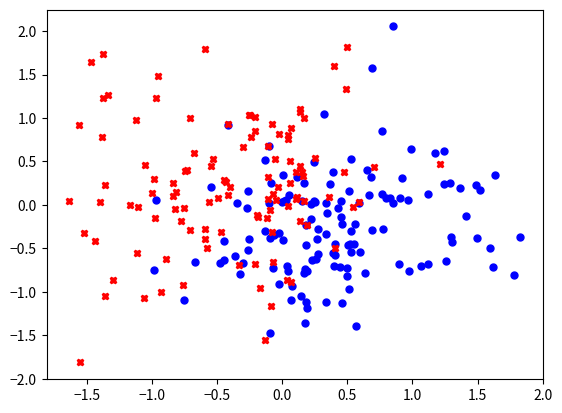

In [49]:
x = data_2004[data_2004['y']==1]
y = data_2004[data_2004['y']==0]

plt.plot(x['GSPC_Change'],x["EURUSD_Change"],"bo",markersize=5)
plt.plot(y['GSPC_Change'],y["EURUSD_Change"],"rX",markersize=5)
plt.show()

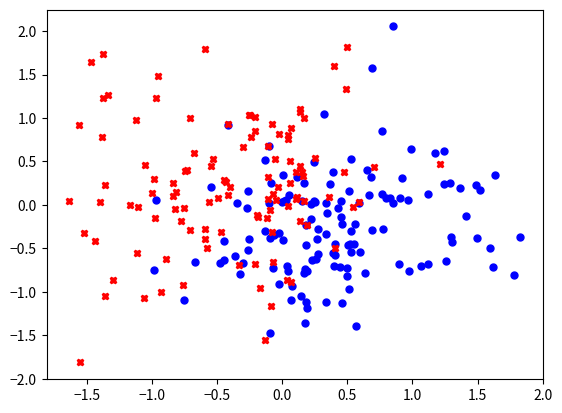

In [50]:
x = data_2004[data_2004['y']==1]
y = data_2004[data_2004['y']==0]

plt.plot(x['GSPC_Change'],x["EURUSD_Change"],"bo",markersize=5)
plt.plot(y['GSPC_Change'],y["EURUSD_Change"],"rX",markersize=5)
plt.show()

Mean squared error: 0.196
Variance score: 0.583
Score: 0.583


c:\Users\41047\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


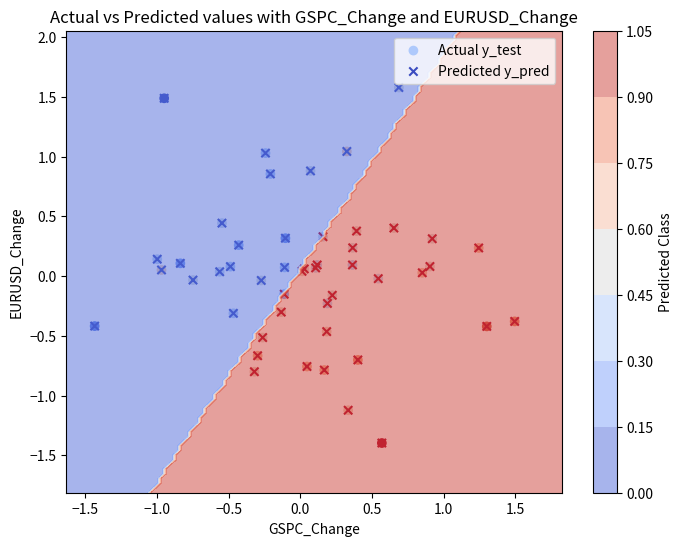

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


X = data_2004.drop(['FIGRX_Change', 'y'], axis=1)
Y = data_2004['FIGRX_Change']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

LR = linear_model.LinearRegression()
LR.fit(X_train, Y_train)

# Predictions
y_pred = LR.predict(X_test)
y_pred_binary = (y_pred > 0).astype(int)

# Print metrics
print('Mean squared error: %.3f' % mean_squared_error(Y_test, y_pred))
print('Variance score: %.3f' % r2_score(Y_test, y_pred))
print('Score: %.3f' % LR.score(X_test, Y_test))

# Plotting actual y_test and predicted y_pred values with x1 and x2
plt.figure(figsize=(8, 6))

# Scatter plot for actual y_test
plt.scatter(X_test['GSPC_Change'], X_test['EURUSD_Change'], c=Y_test, cmap='coolwarm', label='Actual y_test')

# Scatter plot for predicted y_pred with different marker
plt.scatter(X_test['GSPC_Change'], X_test['EURUSD_Change'], c=y_pred_binary, cmap='coolwarm', marker='x', label='Predicted y_pred')

x1_values = np.linspace(min(X['GSPC_Change']), max(X['GSPC_Change']), 100)
x2_values = np.linspace(min(X['EURUSD_Change']), max(X['EURUSD_Change']), 100)
x1_mesh, x2_mesh = np.meshgrid(x1_values, x2_values)
X_mesh = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]

y_pred_mesh = LR.predict(X_mesh)
y_pred_mesh_binary = (y_pred_mesh > 0).astype(int).reshape(x1_mesh.shape)

plt.contourf(x1_mesh, x2_mesh, y_pred_mesh_binary, cmap='coolwarm', alpha=0.5)

plt.xlabel('GSPC_Change')
plt.ylabel('EURUSD_Change')
plt.title('Actual vs Predicted values with GSPC_Change and EURUSD_Change')
plt.legend()
plt.colorbar(label='Predicted Class')
plt.show()


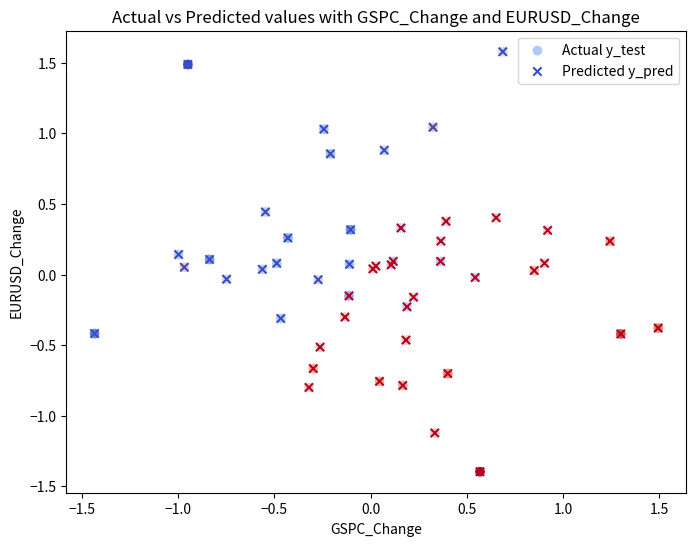

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


X_train = data_2004.drop(['FIGRX_Change', 'y'], axis=1)
Y_train = data_2004['FIGRX_Change']
X_train = data_2005.drop(['FIGRX_Change', 'y'], axis=1)
Y_train = data_2005['FIGRX_Change']

LR = linear_model.LinearRegression()
LR.fit(X_train, Y_train)


y_pred = LR.predict(X_test)
y_pred_binary = (y_pred > 0).astype(int)


plt.figure(figsize=(8, 6))


plt.scatter(X_test['GSPC_Change'], X_test['EURUSD_Change'], c=Y_test, cmap='coolwarm', label='Actual y_test')
plt.scatter(X_test['GSPC_Change'], X_test['EURUSD_Change'], c=y_pred_binary, cmap='coolwarm', marker='x', label='Predicted y_pred')


plt.xlabel('GSPC_Change')
plt.ylabel('EURUSD_Change')
plt.title('Actual vs Predicted values with GSPC_Change and EURUSD_Change')
plt.legend()
plt.show()
